<a href="https://colab.research.google.com/github/GabrielMtzSoltero/SSPIAII/blob/main/06_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets , svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
# Leer datos
#data = pd.read_csv('sample_data/mnist_784.csv')
mnist = fetch_openml('mnist_784')
data=mnist.data



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 784 entries, pixel1 to pixel784
dtypes: float64(784)
memory usage: 418.7 MB


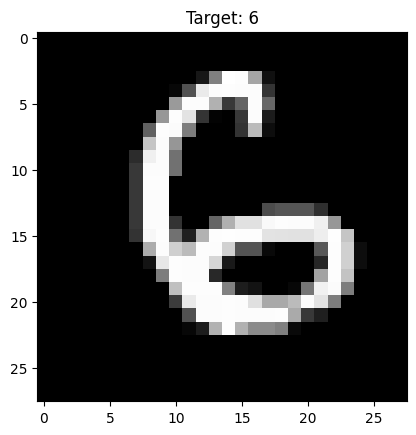

In [5]:
# Definir n m e r o de ejemplos
n_samples = 50000
# vamos a omitir class que es nuestro target o valor deseado
x = np.asanyarray(data)[: n_samples ,:]
y = np.asanyarray(mnist.target)[: n_samples ].ravel()
# Dibujar un ejemplo de manera aleatoria
sample = np.random.randint(n_samples)
plt.imshow(x[sample].reshape((28,28)), cmap=plt.cm.gray)
plt.title('Target: %s' % y[sample])
plt.show()


Train:  0.9185555555555556
Test:  0.92
Classification report: nn               precision    recall  f1-score   support

           0       0.95      0.97      0.96       493
           1       0.92      0.97      0.95       579
           2       0.93      0.92      0.92       509
           3       0.90      0.90      0.90       466
           4       0.91      0.94      0.92       473
           5       0.88      0.87      0.88       459
           6       0.93      0.95      0.94       516
           7       0.94      0.92      0.93       519
           8       0.91      0.86      0.88       495
           9       0.91      0.90      0.90       491

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000

Confusion matrix: nn [[478   0   3   3   0   3   4   0   2   0]
 [  1 563   2   0   1   5   1   0   6   0]
 [  1   3 468   8   7   1  10   2   8   1]
 [  1   3   7 419   0  13 

TypeError: %i format: a real number is required, not str

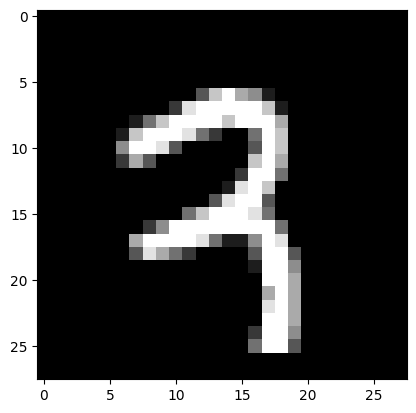

In [6]:
# Separar conjuntos de entrenamiento y prueba
xtrain , xtest , ytrain , ytest = train_test_split(x, y, test_size =0.1)
# Instanciar el Pipeline
model = Pipeline([
('scaler', StandardScaler()),
('PCA', PCA(n_components =50)),
('SVM', svm.SVC(gamma=0.0001))])
model.fit(xtrain , ytrain)


Train:  0.9185555555555556
Test:  0.92
Classification report: nn               precision    recall  f1-score   support

           0       0.95      0.97      0.96       493
           1       0.92      0.97      0.95       579
           2       0.93      0.92      0.92       509
           3       0.90      0.90      0.90       466
           4       0.91      0.94      0.92       473
           5       0.88      0.87      0.88       459
           6       0.93      0.95      0.94       516
           7       0.94      0.92      0.93       519
           8       0.91      0.86      0.88       495
           9       0.91      0.90      0.90       491

    accuracy                           0.92      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.92      0.92      0.92      5000

Confusion matrix: nn [[478   0   3   3   0   3   4   0   2   0]
 [  1 563   2   0   1   5   1   0   6   0]
 [  1   3 468   8   7   1  10   2   8   1]
 [  1   3   7 419   0  13 

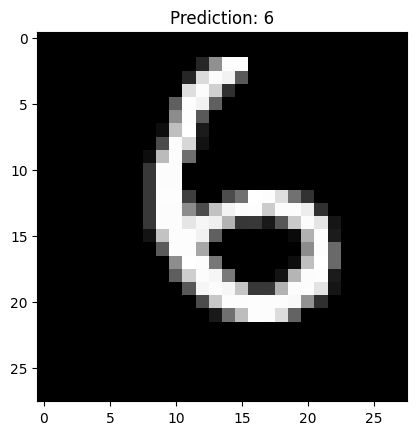

In [7]:
# Aplicar metrica al modelo
print('Train: ', model.score(xtrain , ytrain))
print('Test: ', model.score(xtest , ytest))
# Hacer predicciones del test
ypred = model.predict(xtest)
# Reporte de Cla sifi caci n
print('Classification report: nn', metrics.classification_report(ytest , ypred))
# Matrix de Confusion
print('Confusion matrix: nn', metrics.confusion_matrix(ytest , ypred))
sample = np.random.randint(xtest.shape[0])
plt.imshow(xtest[sample].reshape((28,28)), cmap=plt.cm.gray)
plt.title('Prediction: %s' % ypred[sample])
plt.show()
# Guardar modelo
import pickle
pickle.dump(model , open('Mnist classifier.sav', 'wb'))